**Install packages**

In [1]:
!pip install tensorflow==2.15.0

**Import libraries**

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

import pickle
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

from google.colab import files
import shutil
import os

**Mount drive**

In [3]:
from google.colab import drive
import os

drive.mount('/content/drive')
root_path = '/content/drive/MyDrive/Aprendizado de máquina/Trabalho 1 - Clonagem comportamental'   # Script location
os.chdir(root_path)

Mounted at /content/drive


**Load datapoints**

In [4]:
all_datapoints = []

for file in os.listdir('dataset'):
    if 'datapoint' in file:
        with open('dataset/'+file, 'rb') as f:
            datapoints = pickle.load(f)
            all_datapoints.extend(datapoints)

In [5]:
x = np.array([data[0] for data in all_datapoints])
y = np.array([data[1] for data in all_datapoints])

del all_datapoints

**See some data**

array([[[105, 105, 105],
        [103, 103, 103],
        [102, 102, 102],
        ...,
        [100, 228, 100],
        [100, 208, 100],
        [100, 202, 100]],

       [[104, 104, 104],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [100, 228, 100],
        [100, 210, 100],
        [100, 202, 100]],

       [[103, 103, 103],
        [102, 102, 102],
        [101, 101, 101],
        ...,
        [100, 228, 100],
        [100, 213, 100],
        [100, 202, 100]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
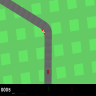

In [6]:
x[15]

In [7]:
y[15]

array([0.00123449, 0.        , 0.00622695])

**Train/test split**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)

x_train_norm = x_train/float(255)
x_test_norm = x_test/float(255)

y_train_norm = copy.deepcopy(y_train)
y_train_norm[:, 0] = (y_train_norm[:, 0] + 1) / 2

y_test_norm = copy.deepcopy(y_test)
y_test_norm[:, 0] = (y_test_norm[:, 0] + 1) / 2

del x
del y

**Build model**

In [9]:
def create_model(input_shape, dropout_rate, n):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    conv1 = tf.keras.layers.Conv2D(16, (7, 7), strides=(1, 1), activation='relu')(input_layer)

    conv2 = tf.keras.layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu')(conv1)

    conv3 = tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu')(conv2)

    conv4 = tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), activation='relu')(conv3)

    conv5 = tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu')(conv4)

    conv6 = tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), activation='relu')(conv5)

    flatten = tf.keras.layers.Flatten()(conv6)

    hidden = tf.keras.layers.Dense(n, activation='relu')(flatten)

    dropout = tf.keras.layers.Dropout(dropout_rate)(hidden)

    output_layer = tf.keras.layers.Dense(3, activation='sigmoid')(dropout)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    return model

**Callback to save the best model**

In [10]:
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()

**Training loop**

In [11]:
n_list = [16, 64, 256]
d_list = [0, 0.2]
lr_list = [0.0005, 0.001]

input_shape = (96, 96, 3)
bs = 16
epochs = 80

Epoch 1/80
633/633 [==============================] - 18s 13ms/step - loss: 0.0659 - val_loss: 0.0500
Epoch 2/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0504 - val_loss: 0.0461
Epoch 3/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0441 - val_loss: 0.0411
Epoch 4/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0390 - val_loss: 0.0410
Epoch 5/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0348 - val_loss: 0.0348
Epoch 6/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0320 - val_loss: 0.0309
Epoch 7/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0290 - val_loss: 0.0299
Epoch 8/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0271 - val_loss: 0.0281
Epoch 9/80
633/633 [==============================] - 5s 8ms/step - loss: 0.0245 - val_loss: 0.0238
Epoch 10/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0229 - val_loss

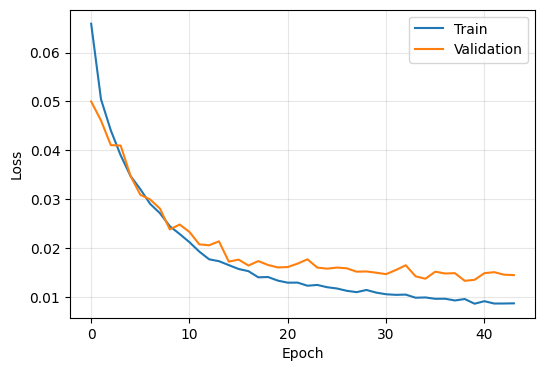

80/80 [==============================] - 0s 3ms/step - loss: 0.0133
Model 1 - Loss = 0.013291053473949432 - n = 16, d = 0, lr = 0.0005
Epoch 1/80
  2/633 [..............................] - ETA: 2:07 - loss: 0.1760 

633/633 [==============================] - 8s 9ms/step - loss: 0.0706 - val_loss: 0.0579
Epoch 2/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0528 - val_loss: 0.0453
Epoch 3/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0449 - val_loss: 0.0393
Epoch 4/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0394 - val_loss: 0.0463
Epoch 5/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0352 - val_loss: 0.0336
Epoch 6/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0319 - val_loss: 0.0326
Epoch 7/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0299 - val_loss: 0.0311
Epoch 8/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0270 - val_loss: 0.0273
Epoch 9/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0239 - val_loss: 0.0267
Epoch 10/80
633/633 [==============================] - 5s 8ms/step - loss: 0.0223 - val_loss: 0.0222
Epo

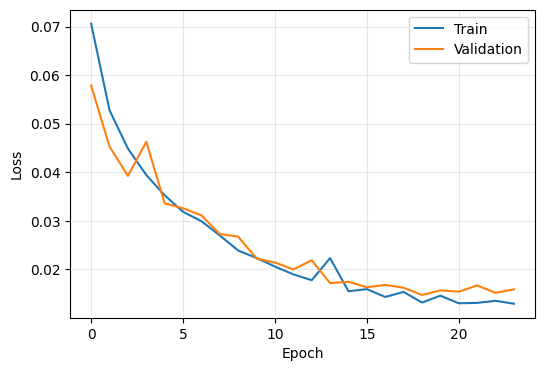

80/80 [==============================] - 0s 3ms/step - loss: 0.0147
Model 2 - Loss = 0.014715888537466526 - n = 16, d = 0, lr = 0.001
Epoch 1/80
633/633 [==============================] - 14s 16ms/step - loss: 0.0780 - val_loss: 0.0575
Epoch 2/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0576 - val_loss: 0.0525
Epoch 3/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0522 - val_loss: 0.0465
Epoch 4/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0487 - val_loss: 0.0429
Epoch 5/80
633/633 [==============================] - 7s 10ms/step - loss: 0.0454 - val_loss: 0.0428
Epoch 6/80
633/633 [==============================] - 9s 14ms/step - loss: 0.0418 - val_loss: 0.0358
Epoch 7/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0383 - val_loss: 0.0337
Epoch 8/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0344 - val_loss: 0.0307
Epoch 9/80
633/633 [==============================] - 6s 9m

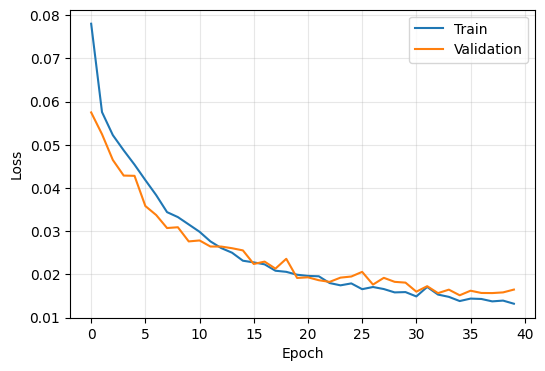

80/80 [==============================] - 2s 22ms/step - loss: 0.0152
Model 3 - Loss = 0.015161849558353424 - n = 16, d = 0.2, lr = 0.0005
Epoch 1/80
  2/633 [..............................] - ETA: 8:17 - loss: 0.1801 

633/633 [==============================] - 12s 16ms/step - loss: 0.0902 - val_loss: 0.0707
Epoch 2/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0617 - val_loss: 0.0529
Epoch 3/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0527 - val_loss: 0.0442
Epoch 4/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0492 - val_loss: 0.0432
Epoch 5/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0480 - val_loss: 0.0455
Epoch 6/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0468 - val_loss: 0.0452
Epoch 7/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0456 - val_loss: 0.0408
Epoch 8/80
633/633 [==============================] - 5s 8ms/step - loss: 0.0448 - val_loss: 0.0404
Epoch 9/80
633/633 [==============================] - 5s 8ms/step - loss: 0.0435 - val_loss: 0.0404
Epoch 10/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0429 - val_loss: 0.0450
Epo

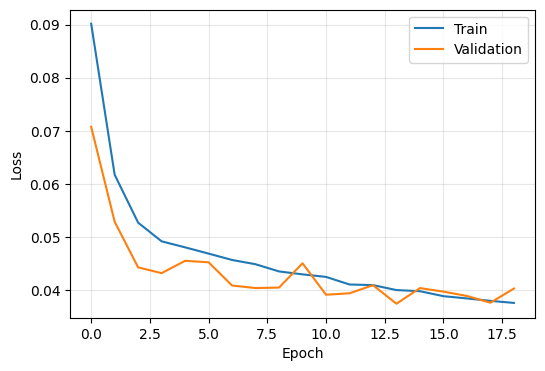

80/80 [==============================] - 2s 22ms/step - loss: 0.0374
Model 4 - Loss = 0.0373978316783905 - n = 16, d = 0.2, lr = 0.001
Epoch 1/80
633/633 [==============================] - 11s 13ms/step - loss: 0.0698 - val_loss: 0.0572
Epoch 2/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0507 - val_loss: 0.0440
Epoch 3/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0429 - val_loss: 0.0401
Epoch 4/80
633/633 [==============================] - 9s 14ms/step - loss: 0.0372 - val_loss: 0.0357
Epoch 5/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0332 - val_loss: 0.0328
Epoch 6/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0311 - val_loss: 0.0299
Epoch 7/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0283 - val_loss: 0.0269
Epoch 8/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0261 - val_loss: 0.0261
Epoch 9/80
633/633 [==============================] - 5s 

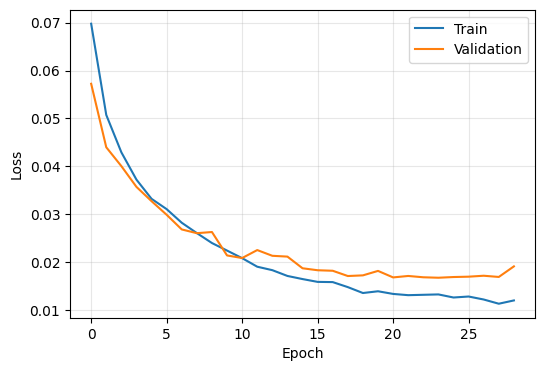

80/80 [==============================] - 0s 3ms/step - loss: 0.0168
Model 5 - Loss = 0.0167975053191185 - n = 64, d = 0, lr = 0.0005
Epoch 1/80
  2/633 [..............................] - ETA: 6:31 - loss: 0.1785 

633/633 [==============================] - 12s 15ms/step - loss: 0.0686 - val_loss: 0.0526
Epoch 2/80
633/633 [==============================] - 7s 10ms/step - loss: 0.0499 - val_loss: 0.0464
Epoch 3/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0436 - val_loss: 0.0454
Epoch 4/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0378 - val_loss: 0.0356
Epoch 5/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0338 - val_loss: 0.0322
Epoch 6/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0316 - val_loss: 0.0319
Epoch 7/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0281 - val_loss: 0.0279
Epoch 8/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0258 - val_loss: 0.0276
Epoch 9/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0237 - val_loss: 0.0236
Epoch 10/80
633/633 [==============================] - 7s 10ms/step - loss: 0.0269 - val_loss: 0.0234


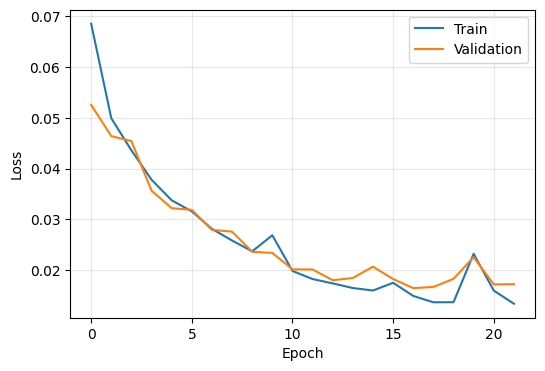

80/80 [==============================] - 1s 16ms/step - loss: 0.0164
Model 6 - Loss = 0.016438646242022514 - n = 64, d = 0, lr = 0.001
Epoch 1/80
633/633 [==============================] - 10s 12ms/step - loss: 0.0745 - val_loss: 0.0560
Epoch 2/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0526 - val_loss: 0.0442
Epoch 3/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0455 - val_loss: 0.0388
Epoch 4/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0409 - val_loss: 0.0350
Epoch 5/80
633/633 [==============================] - 5s 8ms/step - loss: 0.0362 - val_loss: 0.0318
Epoch 6/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0331 - val_loss: 0.0305
Epoch 7/80
633/633 [==============================] - 7s 10ms/step - loss: 0.0306 - val_loss: 0.0294
Epoch 8/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0284 - val_loss: 0.0271
Epoch 9/80
633/633 [==============================] - 7s 

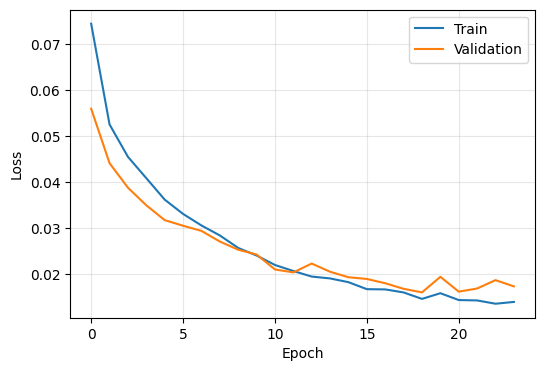

80/80 [==============================] - 1s 13ms/step - loss: 0.0160
Model 7 - Loss = 0.01601092889904976 - n = 64, d = 0.2, lr = 0.0005
Epoch 1/80
633/633 [==============================] - 11s 13ms/step - loss: 0.0829 - val_loss: 0.0629
Epoch 2/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0589 - val_loss: 0.0568
Epoch 3/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0518 - val_loss: 0.0478
Epoch 4/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0480 - val_loss: 0.0453
Epoch 5/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0464 - val_loss: 0.0428
Epoch 6/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0451 - val_loss: 0.0436
Epoch 7/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0436 - val_loss: 0.0421
Epoch 8/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0428 - val_loss: 0.0393
Epoch 9/80
633/633 [==============================] - 9s

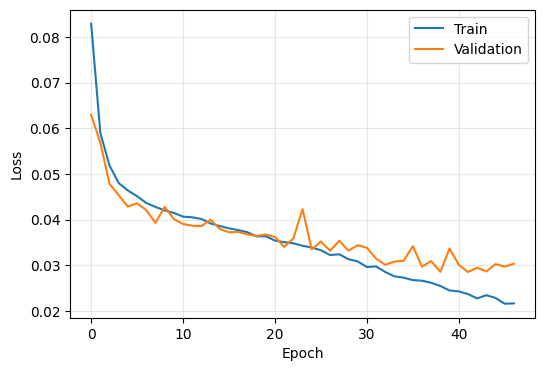

80/80 [==============================] - 0s 5ms/step - loss: 0.0285
Model 8 - Loss = 0.02851618081331253 - n = 64, d = 0.2, lr = 0.001
Epoch 1/80
633/633 [==============================] - 10s 12ms/step - loss: 0.0738 - val_loss: 0.0579
Epoch 2/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0525 - val_loss: 0.0448
Epoch 3/80
633/633 [==============================] - 9s 14ms/step - loss: 0.0447 - val_loss: 0.0418
Epoch 4/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0388 - val_loss: 0.0351
Epoch 5/80
633/633 [==============================] - 5s 8ms/step - loss: 0.0351 - val_loss: 0.0350
Epoch 6/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0322 - val_loss: 0.0310
Epoch 7/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0301 - val_loss: 0.0297
Epoch 8/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0294 - val_loss: 0.0288
Epoch 9/80
633/633 [==============================] - 6s 

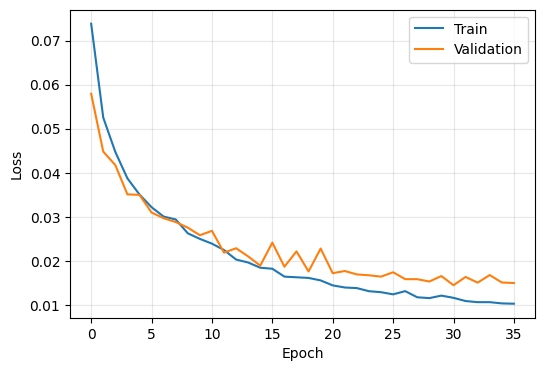

80/80 [==============================] - 1s 13ms/step - loss: 0.0145
Model 9 - Loss = 0.014513390138745308 - n = 256, d = 0, lr = 0.0005
Epoch 1/80
633/633 [==============================] - 9s 10ms/step - loss: 0.0682 - val_loss: 0.0539
Epoch 2/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0504 - val_loss: 0.0447
Epoch 3/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0411 - val_loss: 0.0372
Epoch 4/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0365 - val_loss: 0.0353
Epoch 5/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0308 - val_loss: 0.0316
Epoch 6/80
633/633 [==============================] - 7s 10ms/step - loss: 0.0284 - val_loss: 0.0275
Epoch 7/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0238 - val_loss: 0.0230
Epoch 8/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0223 - val_loss: 0.0213
Epoch 9/80
633/633 [==============================] - 7

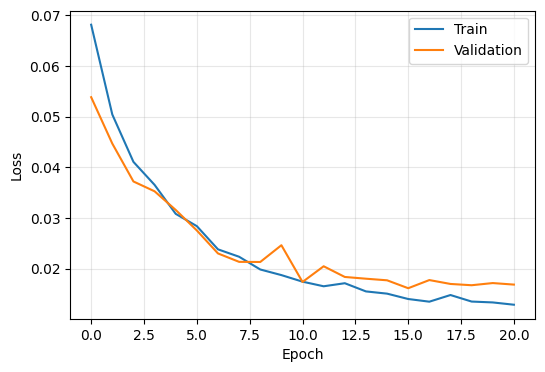

80/80 [==============================] - 0s 3ms/step - loss: 0.0161
Model 10 - Loss = 0.016127934679389 - n = 256, d = 0, lr = 0.001
Epoch 1/80
  2/633 [..............................] - ETA: 7:34 - loss: 0.1735 

633/633 [==============================] - 12s 15ms/step - loss: 0.0704 - val_loss: 0.0567
Epoch 2/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0526 - val_loss: 0.0461
Epoch 3/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0468 - val_loss: 0.0407
Epoch 4/80
633/633 [==============================] - 7s 12ms/step - loss: 0.0409 - val_loss: 0.0367
Epoch 5/80
633/633 [==============================] - 8s 13ms/step - loss: 0.0351 - val_loss: 0.0344
Epoch 6/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0301 - val_loss: 0.0276
Epoch 7/80
633/633 [==============================] - 6s 9ms/step - loss: 0.0262 - val_loss: 0.0251
Epoch 8/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0229 - val_loss: 0.0225
Epoch 9/80
633/633 [==============================] - 9s 14ms/step - loss: 0.0211 - val_loss: 0.0208
Epoch 10/80
633/633 [==============================] - 6s 10ms/step - loss: 0.0189 - val_loss: 0.0206


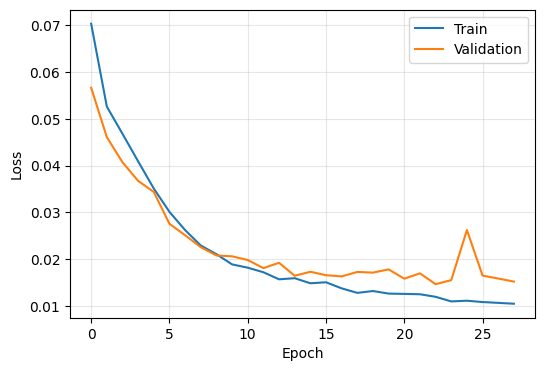

80/80 [==============================] - 1s 17ms/step - loss: 0.0146
Model 11 - Loss = 0.014634950086474419 - n = 256, d = 0.2, lr = 0.0005
Epoch 1/80
633/633 [==============================] - 10s 12ms/step - loss: 0.0660 - val_loss: 0.0496
Epoch 2/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0485 - val_loss: 0.0455
Epoch 3/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0415 - val_loss: 0.0391
Epoch 4/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0368 - val_loss: 0.0320
Epoch 5/80
633/633 [==============================] - 9s 14ms/step - loss: 0.0341 - val_loss: 0.0341
Epoch 6/80
633/633 [==============================] - 7s 11ms/step - loss: 0.0330 - val_loss: 0.0296
Epoch 7/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0291 - val_loss: 0.0294
Epoch 8/80
633/633 [==============================] - 8s 12ms/step - loss: 0.0269 - val_loss: 0.0270
Epoch 9/80
633/633 [==============================]

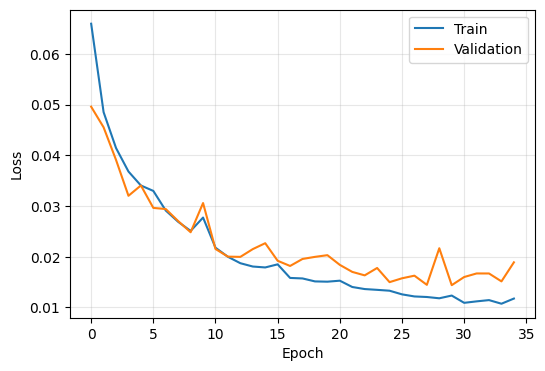

80/80 [==============================] - 0s 4ms/step - loss: 0.0144
Model 12 - Loss = 0.01438983716070652 - n = 256, d = 0.2, lr = 0.001


In [12]:
i = 1
for n in n_list:
    for d in d_list:
        for lr in lr_list:

            dropout_rate = d
            init_lr = lr

            model = create_model(input_shape, dropout_rate, n)

            optimizer = tf.keras.optimizers.experimental.Adam(learning_rate=init_lr)
            loss = tf.keras.losses.MeanSquaredError()

            save_best_model = SaveBestModel(save_best_metric='val_loss')
            callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5),
                        save_best_model]

            model.compile(optimizer=optimizer, loss=loss)

            history = model.fit(x_train_norm, y_train_norm,
                                validation_data=(x_test_norm, y_test_norm),
                                epochs=epochs,
                                batch_size=bs,
                                callbacks=callbacks)

            model.set_weights(save_best_model.best_weights)

            plt.figure(figsize=(6, 4))
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Validation'])

            plt.grid(True, alpha=0.3)
            plt.show()

            loss = model.evaluate(x_test_norm, y_test_norm)

            model.save(f"models/model_{i}")

            with open('metrics.txt', 'a') as f:
                f.write(f"Model {i} - Loss = {loss} - n = {n}, d = {d}, lr = {lr}\n")

            print(f"Model {i} - Loss = {loss} - n = {n}, d = {d}, lr = {lr}")

            del model

            i += 1